In [1]:
### Machine Learning Project 3 -- By: Ryan Canfield -- Due: Mon May 1, 2023 5:00pm
### In this project, you will continue to use the dataset that you have been using in Projects 1 and 2 to build
### neural networks that can predict your target outcome from your set of features. 

## Part 1: Building a multi-layer perception using MLPClassifier in scikit-learn
## In this part of the project, you will use MLPClassifier from the scikit-learn package in Python 
## to build a multi-layer perception.

# Libraries/Modules/Imports used.
import pandas as pd # Used for data analysis and manipulation.
import numpy as np # Used for arrays, matrices, and high-level math functions. 
import matplotlib.pyplot as plt # Used for graphics and visuals.
import seaborn as sns # Used for visuals as well as exploring the data.
import os # Helps with operating system.
import warnings # Used to suppress warning.
warnings.filterwarnings("ignore")

import torch # Need this to generate torch tensors.
import torch.nn as nn # Need this to run neural netowrks in Pytorch.
from torch.utils.data import Dataset # Need this to have torch-compatible dataset.

from sklearn.model_selection import train_test_split # Used for splitting data.
from sklearn.preprocessing import MinMaxScaler # Used for scaling data.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Used to create a confusion matrix.
from sklearn.metrics import accuracy_score # Used to show accuracy.
from sklearn.neural_network import MLPClassifier # Contains the NN MLP Classifier.


In [3]:
## 1. Split your data into a training and test set using the same instructions from prior projects.
# Reading in the data.
heart = pd.read_csv("C:/Users/RRC/OneDrive/Documents/CLASSES/YEAR 3/Semester 2/Machine Learning/Data Sets/heart.csv") 
print(heart.head(6))

# Splitting the data from the variables and the label
X = heart.iloc[:, 0:13]
y = heart.iloc[:, 13]
y = np.where(y == 0, 0, 1) # Needs to happen to change from a dataframe to numpy array used for Train test split.

# Scaling all the numerical columns (All data falls between 0 and 1).
mms = MinMaxScaler()
mms.fit(X)
Xmm = mms.transform(X)

# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(Xmm, y, stratify = y, test_size = 0.2, random_state = 0)

# Gets the dimensions of the all the split sets.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # Checking to see if the split works.


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0      1       1  
(242, 13) (61, 13) (242,) (61,)


In [4]:
## 2. Use your training data to fit a number of MLPClassifier() models with different numbers of hidden layers,
## different numbers of hidden units, and different activation functions, similar to what you did in Homework 6.
## For each model you create, print out the accuracy score to assess how each model is doing. For example, 
## for two different models, this is what your code might look like:

# mlp1 and mlp2 were given.
mlp1 = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic')
mlp1.fit(X_train, y_train)
print(mlp1.score(X_train, y_train))

mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100), activation = 'identity')
mlp2.fit(X_train, y_train)
print(mlp2.score(X_train, y_train))

## Play around with different parameters until you feel that you have found a good model (high accuracy score). 
## You do not need to show every single model that you fit in your code. However, you should test many different 
## combinations and track the parameters you tried and their outcome (i.e., the score) in a separate table or list that
## you can include as text in your Python code or as a separate document. 

# Best model copied and tweaked from Homework 6.
mlpbest = MLPClassifier(hidden_layer_sizes = (250, 125, 62, 30), activation = 'relu')
mlpbest.fit(X_train, y_train)
print(mlpbest.score(X_train, y_train))
# Note: when using the logistic activation function the accuracy plumments to .54. 


0.8429752066115702
0.8264462809917356
0.9834710743801653


In [6]:
## 3. Once you have decided on your best model, take that model and generate predictions on your test set. For example,
## let's say that my model stored in object "mlp1" ended up being my best model. This is what my prediction code might
## look like:

# y_pred = mlp1.predict(X_test)
y_predbest = mlpbest.predict(X_test)


The accuracy for the MLP Classifier on the test data is  0.8525


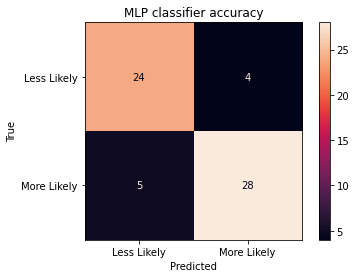

In [7]:
## 4. Generate a confusion matrix and overall accuracy score to compare your actual outcome to the predicted labels. 
## Provide a 1-2 sentence description of the results. In addition, answer this question: Is the accuracy score of the
## prediction on the test data higher or lower than the score of that model in step 2? If it is lower, provide some
## reasons why you think that might be the case.   

cf_matrixbest = confusion_matrix(y_test, y_predbest)
cmdbest = ConfusionMatrixDisplay(cf_matrixbest,  display_labels = ['Less Likely', 'More Likely'])
cmdbest.plot(cmap = 'rocket')
cmdbest.ax_.set(xlabel = 'Predicted', ylabel = 'True', title = 'MLP classifier accuracy')

print('The accuracy for the MLP Classifier on the test data is ','%.4f' %accuracy_score(y_test, y_predbest))

# The accuracy when testing the accuracy on the test set was 85.25%, which was slightly higher then the training set which
# had an accuracy of 83.47%. In the confusion matrix below it has 5 false positives (bottom left) and 
# 4 false neagatives (top right) as well as 23 correctly labeled patient that are less likely to have a heart attack
# and 28 paitents that are more likely to have a hear attack.


In [8]:
## 5. Has this multi-layer perceptron that you've generated done better than the models in Projects 1 and 2? 
## Report the accuracy scores that you generated from the models in prior projects to provide evidence for your answer.  

# This multi-layer perceptron has done better then all the models used in project 1 and project 2, with exception for the
# Logestic Regression model in project 2. That had an accuracy of 88% when classifiying with the test set instead of 
# this models 85%. 

# The Other accuracies for the other two projects classiferes were:

## Project #1
# basic perceptron (learning rate 0.10) accuracy = 0.7705
# basic perceptron (learning rate 0.25) accuracy = 0.8261
# basic perceptron (learning rate 0.50) accuracy = 0.8033
# basic perceptron (learning rate 0.22) accuracy = 0.7869

## Project #2
# basic AdalineSGD (learning rate 0.10) accuracy = 0.7541
# basic LogisticRegressionSGD (learning rate 0.10) accuracy = 0.8689
# best AdalineSGD (learning rate 0.01) accuracy = 0.8033
# best LogisticRegressionSGD (learning rate 0.025) accuracy = 0.8852

# From the table above we can see that it provides evidence that the LogisticRegressionSGD classifier was better
# even when run on the basic settings. I'm not sure why because when you use a logestic activation method for the NN the
# accuracy gets cut in half.


In [9]:
### Part 2: Building a multi-layer perception using torch.nn in PyTorch
### In this part of the project, you will use PyTorch to build a multi-layer perception. 

## 1. Take the same training data you created in step 1 of Part 1 of this Project and run it through class FeatureDataset 
## (as you did in Homework 7) to generate a PyTorch-compatible dataset. Note: To do this, you may need to save your 
## training set to a csv file and then load it into class FeatureDataset. You do not need to do this for the test set. 


In [7]:
## Building a customized class called "FeatureDataset" that uses the torch Dataset function
## to generate a dataset that is compatible with PyTorch

class FeatureDataset(Dataset): 
    
    # This defintion reads in our data set. Note that we do not split into a training and test set because 
    # at training the torch model can do this automatically
    def __init__(self, file_name):
    
        # Read csv file and load row data into variables
        file_out = pd.read_csv(file_name)
        x = file_out.iloc[:, 0:13].values # Stores every column except for the last one in X
        y = file_out.iloc[:, 13].values #You may need to change these based on your data set
        
        # Scaling the data with min max all data between 1 and 0 
        mms = MinMaxScaler()
        X = mms.fit_transform(x)
        y = y

        # Convert to torch tensors
        self.X_batch = torch.tensor(X, dtype = torch.float32)
        self.y_batch = torch.from_numpy(y).view(1, -1)[0].type(torch.LongTensor) #A change from last week's code
        
    # We use these next two functions to overwrite torch.Dataset's unimplemented methods. 
    # Do not make any edits to these two functions. 
    def __len__(self):
        return len(self.y_batch)
    
    def __getitem__(self, idx):
        return self.X_batch[idx], self.y_batch[idx]
    

In [8]:
# Converting it back into a data frame
# X_train and y_train is from the second chunk 
df1 = pd.DataFrame(X_train, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 
                                       'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])
df1['output'] = y_train

df1.to_csv("C:/Users/RRC/OneDrive/Documents/CLASSES/YEAR 3/Semester 2/Machine Learning/Data Sets/modified_heart.csv",
           index = False)


In [9]:
## 2. Using your PyTorch-compatible dataset, set up a DataLoader for training your model. Set shuffle = True. 
## You also need to define a batch_size. The batch_size you use depends somewhat on the size of your dataset. 
## If you have a large dataset (>5000 rows), you may want to use a batch_size = 100. If you have a small dataset
## (<200 rows), use may want to use a batch_size = 10.  

## Creating a PyTorch-compatible dataset
# Let's try again to convert our dataset to a toch-compatible dataset
feature_set = FeatureDataset("C:/Users/RRC/OneDrive/Documents/CLASSES/YEAR 3/Semester 2/Machine Learning/Data Sets/modified_heart.csv")
    
# Loading the data into the torch DataLoader function
torched_heart = torch.utils.data.DataLoader(feature_set, batch_size = 1, shuffle = True)
print(torched_heart)


In [10]:
## 3. Modify the code for the Torch model that we used in class for the Iris dataset. You should have all your layers 
## defined in your model in the processing order from input to output. Here are some notes to keep in mind:

## You must have at least 3 layers: one input layer, at least one hidden layer, and one output layer.
## The row dimension of the input layer (in_features) should match the number of features in your training set.
## The row dimension of the each hidden layer and the output layer should match the column dimension (out_features)
## of the previous layer.
## The model you create should match the best model you chose in Part 1 from MLPClassifier (i.e., with the same number
## of hidden layer, same number of hidden units within each layer, and same activation functions). 

# This is the class where we will build our main neural network model with all our layers
# Double check that these layers are correct
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetworkClassificationModel, self).__init__()
        self.input_layer    = nn.Linear(input_dim, 250)
        self.hidden_layer1  = nn.Linear(250, 250)
        self.hidden_layer2  = nn.Linear(250, 125)
        self.hidden_layer3  = nn.Linear(125, 62)
        self.hidden_layer4  = nn.Linear(62, 30)
        self.output_layer   = nn.Linear(30, output_dim)
        self.relu           = nn.ReLU()
        self.Sigmoid        = nn.Sigmoid()
    
    def forward(self, X):
        out  =  self.relu(self.input_layer(X))
        out2 =  self.relu(self.hidden_layer1(out))
        out3 =  self.relu(self.hidden_layer2(out2))
        out4 =  self.relu(self.hidden_layer3(out3))
        out5 =  self.relu(self.hidden_layer4(out4))
        out6 =  self.output_layer(out5)
        return out6


In [11]:
## 4. Train your model in a training loop (see the examples we did in class) using the batches of the data generated
## from DataLoader. The parameters you need to define for the training loop are n_epochs, criterion, and optimizer.
## You can either use the values we used in class or choose others as defined in the textbook. 

# Initializing the neural network model.
n_epochs = 100 # number of iterations the model runs.
input_dim  = 13 # number of columns/variables in X.
output_dim = 2 # number of anwsers in target variable. 

# Defining other model params.
model = NeuralNetworkClassificationModel(input_dim, output_dim)
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Running the neural network 
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in torched_heart:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        

In [12]:
## 5. Evaluate your model (see the examples we did in class) using your test data. You will need to convert your test
## data to tensors in order to test the model. Pay attention to the data types (dtype = ) for your tensors, they should
## match whatever data type you used for your training data. 

# Testing the model
model.eval()
X_test_torch = torch.tensor(X_test, dtype = torch.float32)
y_pred = model(X_test_torch)
final_pred = []
for i in range(len(y_pred)):
    final_pred.append(torch.argmax(y_pred[i]))


Confusion Matrix
The accuracy for the MLP Classifier on the test data is  0.8525


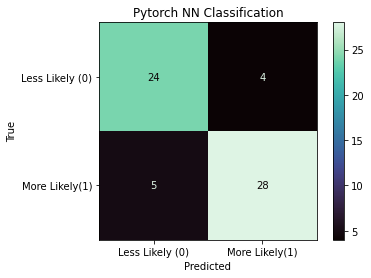

In [33]:
## 6.  Generate a confusion matrix and overall accuracy score to compare your actual outcome
## to the predicted labels. 

# Convert actual and predicted labels to numpy for accuracy_score function
y_pred_final = np.array(final_pred)
y_test_final = np.array(y_test)

# Let's check how our model did 
print('Confusion Matrix')
cf_matrix = confusion_matrix(y_test_final, y_pred_final)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels = ['Less Likely (0)', 'More Likely(1)'])
cmd.plot(cmap = 'mako')
cmd.ax_.set(xlabel='Predicted', ylabel = 'True', title = 'Pytorch NN Classification')
print('The accuracy for the MLP Classifier on the test data is ','%.4f' %accuracy_score(y_test_final, y_pred_final))


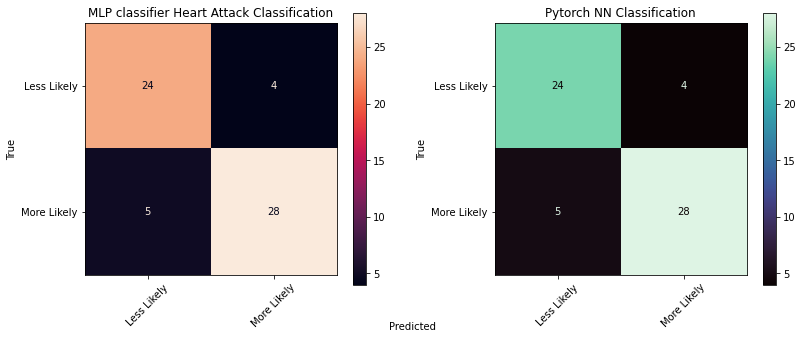

The accuracy for the MLP Classifier on the test data is  0.8525
The accuracy for the Pytorch NN Classifier on the test data is  0.8525


In [34]:
f, axes = plt.subplots(1, 2, figsize = (13, 5)) # Used to put the plots/confusion matrix on the same row

# Confusion Maxtrix for Basic AdalineSGD classifier 
cf_matrixsklearnComp = confusion_matrix(y_test, y_predbest)
disp = ConfusionMatrixDisplay(cf_matrixsklearnComp, display_labels = ['Less Likely','More Likely'])
disp.plot(ax = axes[0], xticks_rotation = 45, cmap = 'rocket')
disp.ax_.set_title('MLP classifier Heart Attack Classification')
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('True')

# Confusion Matrix for Basic LogisticRegressionSGD classifier
cf_matrixpyTorchComp = confusion_matrix(y_test_final, y_pred_final)
disp2 = ConfusionMatrixDisplay(cf_matrixpyTorchComp, display_labels = ['Less Likely', 'More Likely'])
disp2.plot(ax = axes[1], xticks_rotation = 45, cmap = 'mako')
disp2.ax_.set_title('Pytorch NN Classification')
disp2.ax_.set_xlabel('')
disp2.ax_.set_ylabel('True')

f.text(0.45, 0, 'Predicted', ha = 'left')
plt.subplots_adjust(wspace = 0.30, hspace = 0.1)

plt.show()
print('The accuracy for the MLP Classifier on the test data is ','%.4f' %accuracy_score(y_test, y_predbest))
print('The accuracy for the Pytorch NN Classifier on the test data is ','%.4f' %accuracy_score(y_test_final, y_pred_final))

## Provide a 1-2 sentence description of the results. 
## Did the PyTorch model generate similar accuracy results to MLPClassifier? If the results are different,
## what do you think is the reason(s) for the difference in results?

# The Pytorch NN gave the exact results as the MLPClassifier they both gave an accuracy of 85.25%. 
# They also both misclassified the 5 false positives and 4 false neagatives. I think this is due to a small batch size
# and limited data. The data set I used only had 300 rows and 13 variables. You can think of it like the iris dataset but
# double the size, becasue of that reason that is why I think both classifiers have the same accuracy.
